In [54]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import Read
import Maxima
import re
import os
import sys
import pickle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
plt.rcParams['text.usetex'] = False
plt.rcParams.update({'font.size': 12})

### Minimum main

In [53]:
12*1.5

18.0

In [102]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
#Param and definitions
#folder=str(sys.argv[1])
folder_in="/home/ivan/ssd/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/"
tao_compare=2
folder_out="/home/ivan/ssd/filtering/4x4x4x32/b2p44_new/compare_"+str(tao_compare)+"t/gf_afm_0p5t/"
#os.mkdir(folder_out)
sizes=[4,4,4,32]
max_modes=8
colors=3
spin_length=4

conf_start=10
conf_end=40
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)

lambda_min=0.01
lambda_max=0.20
steps=2
lambdas=np.linspace(lambda_min,lambda_max,num=steps)

RPO_threshold=0.15
#Compare.Index_dic(folder_in,lambdas, conf)
Compare.GM_RPO_cut(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf,lambdas,RPO_threshold,tao_compare,False)

lambda_opt=np.loadtxt(folder_out+"lambda_opt.txt")
analyzer.susy_plot(folder_in,folder_out,sizes,colors,spin_length,max_modes,lambda_opt[0],conf)
f.close()

Compare.GM_RPO_cut(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf,np.array([lambda_opt[0]]),RPO_threshold,tao_compare,True)
f.close()


['10', '30']
0
2
2
1
2
2
['10', '30']


SystemExit: 

/home/ivan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### GF

In [37]:
configurations=np.arange(10,500,10)
folder="../4x4x4x32/b2p44_new/gf/"
count_top, conf_read=analyzer.Count_index_gf(folder,configurations)

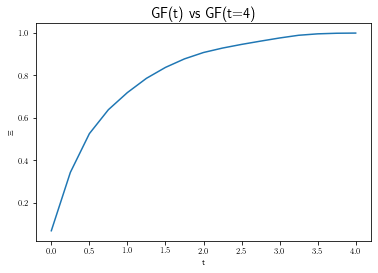

In [3089]:
folder="../4x4x4x32/b2p44_new/"
measure="gf/"
observable="GM"
data=np.loadtxt(folder+measure+observable+".txt")
#ov_max, susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
plt.title('GF(t) vs GF(t=4)')
plt.plot(data[1],data[0], label="$t=4.0$")
plt.savefig(folder+"./GF.pdf")


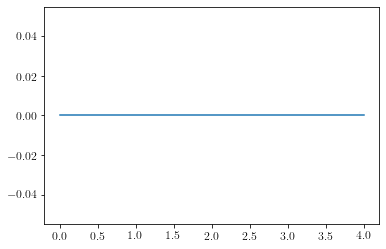

In [2905]:
folder="../4x4x4x32/b2p44_new/"
measure="gf/"
observable="RPO"
data=np.loadtxt(folder+measure+observable+".txt")
#ov_max, susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
plt.plot(data[1],data[0], label="$t=4.0$")
#plt.scatter(susy_max[0],data[0,int(susy_max[1])], color="red", marker="v")


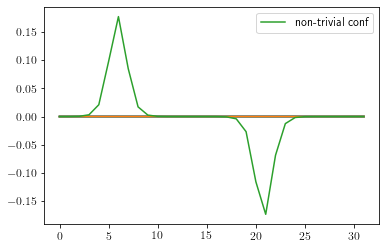

In [3148]:
importlib.reload(analyzer)
folder="../4x4x4x32/b2p44_new/gf_afm/"
t=4
conf_steps=10
ov_top_dif,susy_top_dif,conf_tot,susy_tot=analyzer.Topology_dic(folder,threshold)
for conf in range(conf_start, conf_end, conf_steps):
    if not susy_tot[str(conf)]:
        Topology_t="../4x4x4x32/b2p44_new/gf/profile4dt"+str(t)+"c"+str(conf)+"to.dat"
        density_t,sizes=Read.topology_1d(Topology_t)
        plt.plot(density_t)
Topology_t="../4x4x4x32/b2p44_new/gf/profile4dt"+str(t)+"c"+str(10)+"to.dat"
density_t,sizes=Read.topology_1d(Topology_t)
plt.plot(density_t, label="non-trivial conf")
plt.legend(loc="upper right")
plt.show()
#plt.savefig(folder+"index/Trivial_AFM_compare.pdf")

### Merging plots

In [48]:
for observable in ("GM", "RPO"):
    folder="../ssd/filtering/4x4x4x32/b2p44_new/"
    for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p125t/", "gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/"):
        time=re.sub("gf_afm", "", measure)
        time=re.sub("t","", time)
        time=re.sub("p",".", time)
        time=re.sub("/","", time)
        time=re.sub("_","", time)
        data=np.loadtxt(folder+measure+observable+".txt")
        ov_max, susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
        plt.plot(data[1],data[0], label="t="+time)
        plt.legend(loc="lower right", ncol=3)
        plt.scatter(susy_max[0],data[0,int(susy_max[1])], marker="v")
    plt.savefig(folder+observable+"_2t.pdf")
    plt.close()

### Xi max and GF

In [ ]:
importlib.reload(Compare)
importlib.reload(analyzer)
folder_in="/home/ivan/ssd/filtering/4x4x4x32/b2p44_new/gf/"
folder_out="/home/ivan/ssd/filtering/4x4x4x32/b2p44_new/gf/"
#folder="../4x4x4x32/b2p44_new/gf/"
conf_start=10
conf_end=1000
conf_step=10
configurations=np.arange(conf_start,conf_end,conf_step)
t_start=0
t_end=2
t_step=0.25
RPO_trehsold=0.175
GM_GF=Compare.GF_vs_GF(folder_in, folder_out, configurations, t_start, t_end, t_step,RPO_trehsold,tao_compare)

99
99
99
99
99
99
99
99
99


In [53]:
def Xi_max(data,susy_max):
    maximum=0
    for i in range(0,len(data[0])):
            if (data[0,i] > maximum) and (data[1,i]<susy_max[0]):
                maximum=data[0,i]
    return(maximum)

In [54]:
def find_max(folder,measure,observable):
    data=np.loadtxt(folder+measure+observable+".txt")
    ov_max, susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    maximum=Xi_max(data,susy_max)
    print(maximum)
    return(maximum)

In [50]:
observable="GM"
folder="../4x4x4x32/b2p44_new/two_thresholds_1000c_2t/"
maximum=np.zeros((5))
t=0
for measure in ("gf_afm_2p0t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    f=open(folder_out+"lambda_opt.txt",'r')
    lambda_opt=float(f.read())
    f.close()
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[2,1.125,0.75,0.5,0.25]

folder="../4x4x4x32/b2p44_new/"
measure="gf/"
observable="GM"
data=np.loadtxt(folder+measure+observable+".txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label="GF")
plt.scatter(t,maximum, color="orange", label="GF + AFM")
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_2t.pdf")

OSError: ../4x4x4x32/b2p44_new/two_thresholds_1000c_2t/gf_afm_2p0t/GM.txt not found.

### changing name

In [33]:
for i in ("0", "1"):
    print(i)

0
1


In [ ]:
for flow in ("0p25t",  "0p5t", "0p75t", "1p0t", "1p125t", "1p5t",  "2p0t", "3p0t","4p0t"):
    for i in ("0", "1"):
    directory="./gf_afm"+flow+"/sector_"+i+"/"
        for file in os.listdir(directory):
            if "SusyMode" in file and "-" in file and "bin" not in file:
                name=file.split("-")
                mode=re.sub("\D", "",name[0])
                conf=re.sub("\D", "",name[1])
                new_name="SusyMode_bin_"+mode+"-"+conf
                print(file +" " + new_name)
                os.rename(directory+file, directory+new_name)

In [30]:
directory="../4x4x4x32/b2p44_new/gf_afm_0p5t/sector_0/"
for file in os.listdir(directory):
    if "SusyMode" in file and "-" in file and "bin" not in file:
        name=file.split("-")
        mode=re.sub("\D", "",name[0])
        conf=re.sub("\D", "",name[1])
        new_name="SusyMode_bin_"+mode+"-"+conf
        print(file +" " + new_name)
        os.rename(directory+file, directory+new_name)

SusyMode8-90 SusyMode_bin_8-90
SusyMode6-220 SusyMode_bin_6-220
SusyMode8-40 SusyMode_bin_8-40
SusyMode7-380 SusyMode_bin_7-380
SusyMode5-230 SusyMode_bin_5-230
SusyMode6-50 SusyMode_bin_6-50
SusyMode10-240 SusyMode_bin_10-240
SusyMode4-140 SusyMode_bin_4-140
SusyMode9-390 SusyMode_bin_9-390
SusyMode1-380 SusyMode_bin_1-380
SusyMode11-390 SusyMode_bin_11-390
SusyMode2-220 SusyMode_bin_2-220
SusyMode10-100 SusyMode_bin_10-100
SusyMode0-80 SusyMode_bin_0-80
SusyMode11-300 SusyMode_bin_11-300
SusyMode7-240 SusyMode_bin_7-240
SusyMode3-480 SusyMode_bin_3-480
SusyMode2-30 SusyMode_bin_2-30
SusyMode8-180 SusyMode_bin_8-180
SusyMode1-240 SusyMode_bin_1-240
SusyMode11-320 SusyMode_bin_11-320
SusyMode6-240 SusyMode_bin_6-240
SusyMode9-90 SusyMode_bin_9-90
SusyMode6-370 SusyMode_bin_6-370
SusyMode11-280 SusyMode_bin_11-280
SusyMode4-400 SusyMode_bin_4-400
SusyMode7-260 SusyMode_bin_7-260
SusyMode0-90 SusyMode_bin_0-90
SusyMode0-30 SusyMode_bin_0-30
SusyMode8-490 SusyMode_bin_8-490
SusyMode6-290 

### Example Configurations

In [143]:
folder="../4x4x4x32/b2p44_new/two_thresholds_1000c_2t/"
measure="gf_afm_0p5t/"
configurations=np.arange(10,1000,10)
top_gauge,conf_read=analyzer.Count_index_gf(folder,configurations)
for conf in conf_read:
    #Read GF
    Topology_1=folder+"../gf/profile4dt0.5c"+str(conf)+"to.dat"
    Topology_2=folder+"../gf/profile4dt2c"+str(conf)+"to.dat"
    Topology_3=folder+"../gf/profile4dt4c"+str(conf)+"to.dat"
    density_top_1,sizes=Read.topology_1d(Topology_1)
    density_top_2,sizes=Read.topology_1d(Topology_2)
    density_top_3,sizes=Read.topology_1d(Topology_3)
    
    normalization=np.sum(np.abs(density_top_3))

    #Construct susy mode
    density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
    density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))
    #Plot the three densities
    plt.plot(density_top_1, label=r'top. density $\tau=0.5$')
    plt.plot(density_top_2, label=r'top. density $\tau=2$')
    plt.plot(density_top_3, label=r'top. density $\tau=4$')
    plt.plot(density_susy, label=r'AFM at $\tau=0.5$')
    plt.legend(loc="lower left", ncol=2)
    plt.savefig(folder+measure+"susy_mode_"+str(conf)+".png",dpi=150, bbox_inches='tight')
    plt.close()

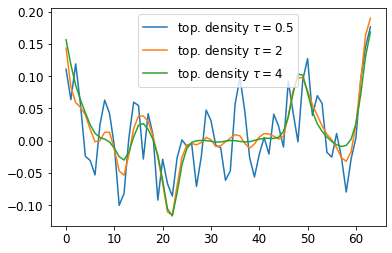

In [41]:
folder="../8x8x8x64_su2/b2p60/"
#measure="gf/"
conf=2300
#Read GF
Topology_1=folder+"./gf/profile4dt0.5c"+str(conf)+"to.dat"
Topology_2=folder+"./gf/profile4dt2c"+str(conf)+"to.dat"
Topology_3=folder+"./gf/profile4dt4c"+str(conf)+"to.dat"
density_top_1,sizes=Read.topology_1d(Topology_1)
density_top_2,sizes=Read.topology_1d(Topology_2)
density_top_3,sizes=Read.topology_1d(Topology_3)

normalization=np.sum(np.abs(density_top_3))

#Construct susy mode
#density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
#density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))
#Plot the three densities
plt.plot(density_top_1, label=r'top. density $\tau=0.5$')
plt.plot(density_top_2, label=r'top. density $\tau=2$')
plt.plot(density_top_3, label=r'top. density $\tau=4$')
#plt.plot(density_susy, label=r'AFM at $\tau=0.5$')
plt.legend(loc="upper center", ncol=1)
plt.savefig(folder+"gf/gf_"+str(conf)+"c.png",dpi=150, bbox_inches='tight')
#plt.close()

### MC history and error bars

/home/ivan/ssd/filtering/4x4x4x32/b2p44_new/compare_2t/gf_afm_0p5t/./GM_hist.txt


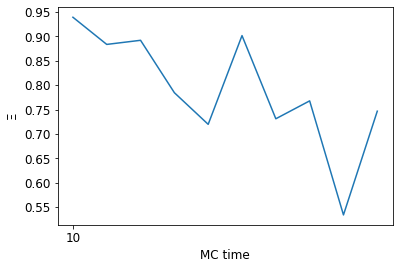

In [83]:
# Read dictionary pkl file
#folder="../4x4x4x32/b2p44_new/two_thresholds_1000c_2t/"
#for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p125t/", "gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/"):
with open(folder_out+"./GM_hist.txt", 'rb') as f:
    print(folder_out+"./GM_hist.txt")
    GM = pickle.load(f)
x=[]
GM_mc=[]
for key in GM:
    GM_mc.append(GM[key])
    x.append(key)
plt.plot(x,GM_mc)
plt.ylabel(r'$\Xi$')
plt.xlabel('MC time')
plt.xticks(np.arange(0, len(GM_mc),  step=10))
plt.savefig(folder_out+"GM_history.png")

In [84]:
for element in GM:
    if GM[element]<0.4:
        print(element)